In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy import fft
from matplotlib.colors import LogNorm

### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

In [2]:
img = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
grayim = 0.2989 * R + 0.5870 * G + 0.1140 * B
f_img = fft.fft2(grayim)
abs_img = np.abs(f_img)

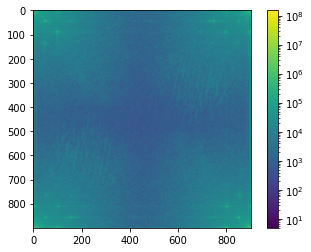

In [3]:
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
plot_spectrum(f_img)

In [4]:
grayim.shape

(900, 900)

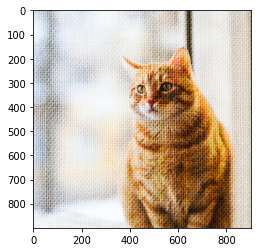

In [5]:
plt.imshow(img)

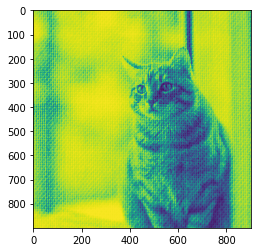

In [6]:
plt.imshow(grayim)

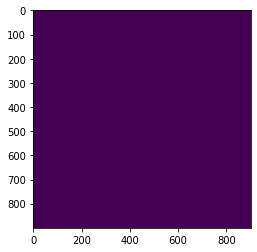

In [7]:
plt.imshow(abs_img)

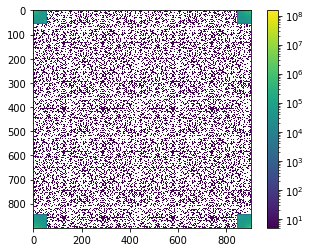

In [8]:
keep_fraction = 0.06
im_fft2 = f_img.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plot_spectrum(im_fft2)

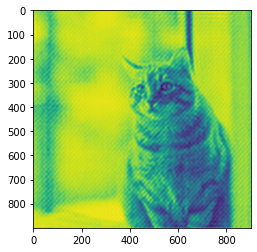

In [9]:
im_new = fft.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new)

In [10]:
def remove(color):
    keep_fraction = 0.07
    im_fft2 = f_img.copy()
    r, c = im_fft2.shape
    im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
    
    im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

    im_new = fft.ifft2(im_fft2).real

    return im_new

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


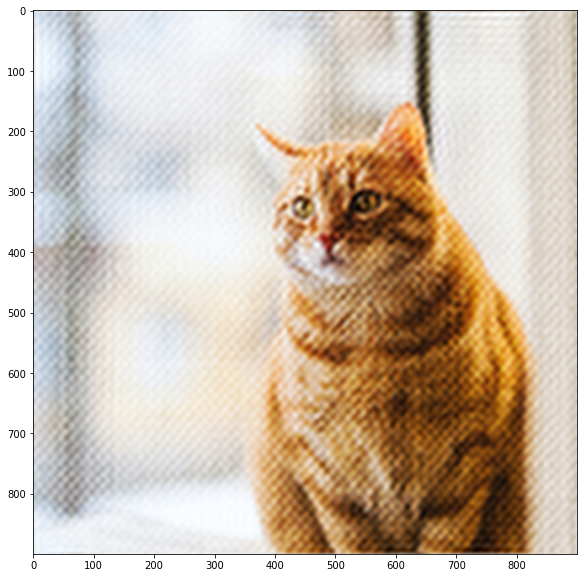

In [11]:
img = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
final_img = np.zeros((900,900,3))
for i, x in enumerate((R, G, B)):
    f_img = fft.fft2(x)
    abs_img = np.abs(f_img)
    new_img = remove(abs_img)
    final_img[:,:,i] = new_img
final_img = final_img.astype(int)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(final_img)
plt.savefig("free_cat.png")

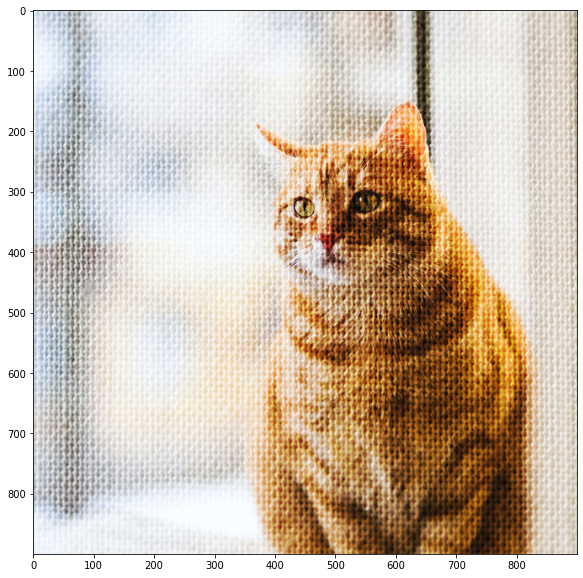

In [12]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


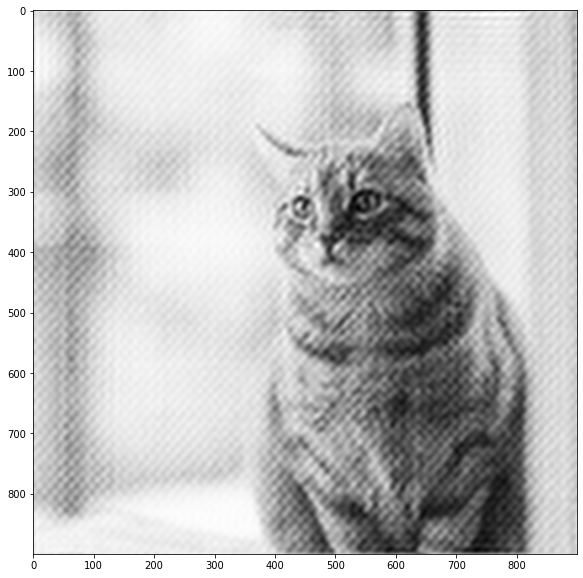

In [13]:
img = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
grayim = 0.2989 * R + 0.5870 * G + 0.1140 * B
f_img = fft.fft2(grayim)
final_img = np.zeros((900,900,3))
for i, x in enumerate((R, G, B)):
    abs_img = np.abs(f_img)
    new_img = remove(abs_img)
    final_img[:,:,i] = new_img
final_img = final_img.astype(int)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(final_img)
plt.savefig("gray_free_cat.png")